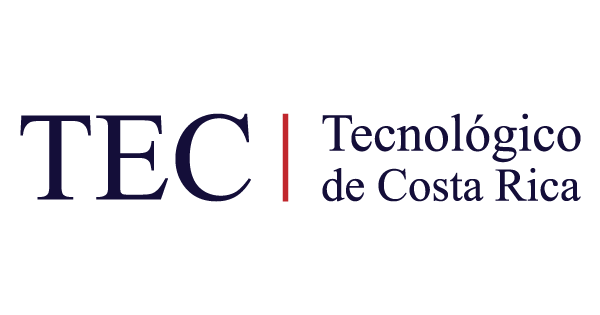
# Agrovoltaic

Dr. Abel Méndez Porras

Estudiante: Joshua Picado


# importación de las bibliotecas

In [ ]:
#Este módulo proporciona funcionalidades para montar Google Drive en el entorno de Colab.
from google.colab import drive

#Este módulo proporciona funcionalidades para interactuar con archivos en el entorno de Colab.
from google.colab import files

#Este módulo mostrará una tabla interactiva con los datos del DataFrame en el entorno de Google Colab.
from google.colab import data_table

#Se utiliza para trazar un gráfico de cuantiles-cuantiles (QQ plot), que es una herramienta
#gráfica para comparar la distribución de una muestra de datos con una distribución teórica
#o con otra muestra de datos.
from statsmodels.graphics.gofplots import qqplot

#Pangas se utiliza principalmente para el análisis y manipulación de datos tabulares.
import pandas as pd

#Seaborn es una biblioteca de visualización de datos en Python basada en Matplotlib,
#que proporciona una interfaz de alto nivel para crear gráficos atractivos y informativos.
import seaborn as sns

#Proporciona una interfaz para interactuar con el sistema operativo.
#trabajar con rutas de archivos y directorios
import os

#Realiza cálculos matemáticos y operaciones con arrays de forma eficiente.
import numpy as np

#Biblioteca que sirve para la interraccion mediante interfaz
import ipywidgets as widgets

#datetime permite realizar operaciones con el manejo del tiempo
from datetime import datetime

#Biblioteca para manejar la interfaz con botones
from IPython.display import display

# Importar Matplotlib y asignarle el alias "plt"
#Matplotlib es una biblioteca de visualización de datos en Python que proporciona una API similar
#a la de MATLAB para crear gráficos de alta calidad.
import matplotlib.pyplot as plt

# Importar Plotly
import plotly.express as px
import plotly.graph_objects as go

# Configuración adicional para mejorar la estética de las visualizaciones
sns.set(style="whitegrid")  # Configurar estilo Seaborn

#Si los datos en el eje x son fechas, puedes formatearlas para que sean más legibles
#import matplotlib.dates as mdates

#ACESSO A GOOGLE DRIVE
Permite el acceso a los documetos de google drive para su lectura

In [ ]:
#Metodo que llama al google drive
drive.mount('/content/drive')

Mounted at /content/drive


#Lectura del archivo Excel con todos los datos
Metodo para confirmar que el archivo fue leído exitosamente

In [ ]:
# Ruta al archivo CSV en Google Drive
ruta_archivo = "/content/drive/MyDrive/Colab Notebooks/Investigación 2024/Agrovoltaic/Data/data_7057_1713819688093-panel horizontal exterior-sin procesar.csv"

# Leer el archivo CSV
try:
    df = pd.read_csv(ruta_archivo, sep=',')
    print("Archivo CSV leído correctamente.")
except FileNotFoundError:
    print(f"Error: El archivo no se encuentra en la ruta especificada: {ruta_archivo}")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo CSV: {e}")


Archivo CSV leído correctamente.


#Graficos de control
Seccion que permite graficar los parametros del archivo

DatePicker(value=None, description='Start Date')

Text(value='00:00:00', description='Start Hour (HH:MM:SS)')

DatePicker(value=None, description='End Date')

Text(value='23:59:59', description='End Hour (HH:MM:SS)')

Dropdown(description='Select Column:', options=('temperature (ºC)', 'air humidity (%)', 'light (lux)', 'water …

Button(description='Generate Graphic', style=ButtonStyle())

Graphic saved at: /content/drive/MyDrive/Colab Notebooks/Investigación 2024/Graficos/Control_Chart_temperature (ºC).png


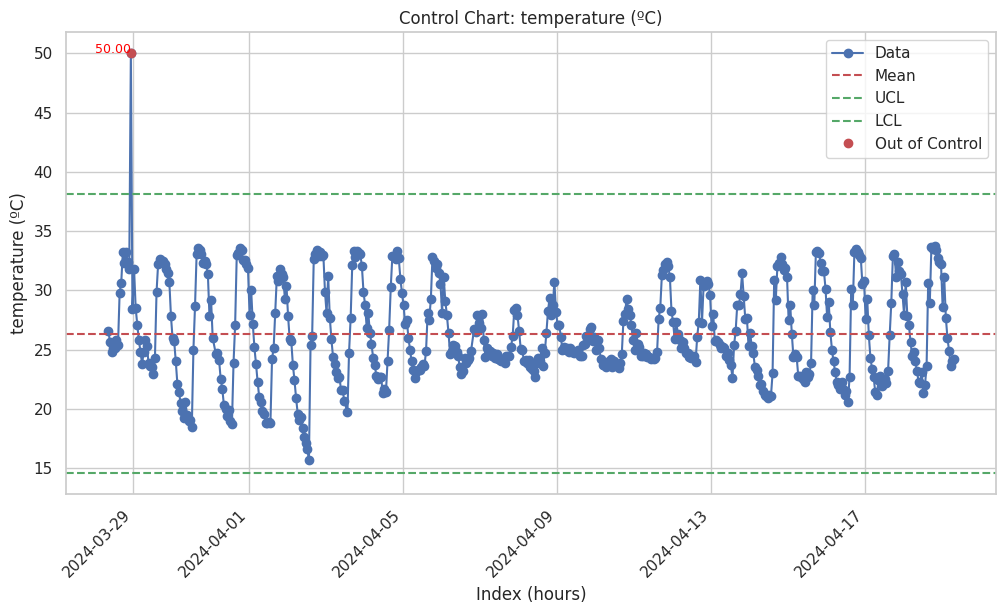

Alert: Out-of-control points detected at the following indices and values:
14    50.0
Name: temperature (ºC), dtype: float64


In [ ]:
# Función para combinar fecha y hora
def combinar_fecha_hora(date, time):
    try:
        return datetime.strptime(f"{time} {date.strftime('%d/%m/%Y')}", '%H:%M:%S %d/%m/%Y')
    except Exception as e:
        print(f"Error in date/time format: {e}")
        return None

# Función para filtrar los datos y graficar
def plot_control_chart(ruta_archivo, start_datetime, end_datetime, column_to_plot, factor=3, title="Control Chart", xlabel="Index", ylabel="Value", figsize=(12, 6), save_path="/content/drive/MyDrive/Colab Notebooks/Investigación 2024/Graficos"):
    # Cargar el archivo CSV
    df = pd.read_csv(ruta_archivo)

    # Convertir la columna 0 (fechas y horas) a formato datetime
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], format='%H:%M:%S %d/%m/%Y')

    # Filtrar los datos por el rango de fechas
    df = df[(df[df.columns[0]] >= start_datetime) & (df[df.columns[0]] <= end_datetime)]

    # Revisar si hay datos después de filtrar
    if df.empty:
        print("There is no data in the selected range.")
        return

    # Extraer las columnas para graficar
    name_x = df.columns[0]  # columna de fechas
    name_y = column_to_plot  # columna seleccionada por el usuario
    x = df[name_x].copy()
    y = df[name_y].copy()

    # Calcular la media y la desviación estándar
    mean = y.mean()
    std_dev = y.std()

    # Calcular los límites de control
    UCL = mean + factor * std_dev
    LCL = mean - factor * std_dev
    y[14] = 50

    # Comprobar puntos fuera de control
    out_of_control = y[(y > UCL) | (y < LCL)]

    # Graficar
    plt.figure(figsize=figsize)
    plt.plot(x, y, 'bo-', label='Data')
    plt.axhline(y=mean, color='r', linestyle='--', label='Mean')
    plt.axhline(y=UCL, color='g', linestyle='--', label='UCL')
    plt.axhline(y=LCL, color='g', linestyle='--', label='LCL')

    # Resaltar puntos fuera de control
    if not out_of_control.empty:
        plt.plot(x[out_of_control.index], y[out_of_control.index], 'ro', label='Out of Control')
        for i in out_of_control.index:
            plt.text(x[i], y[i], f'{y[i]:.2f}', color='red', fontsize=9, ha='right')

    plt.xlabel(f"{xlabel} (hours)")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(name_y)
    plt.title(title + ": " + name_y)
    plt.legend()
    plt.grid(True)

    # Crear directorio si no existe
    os.makedirs(save_path, exist_ok=True)
    file_path = os.path.join(save_path, f"{title.replace(' ', '_')}_{column_to_plot}.png")

    # Guardar el gráfico
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    print(f"Graphic saved at: {file_path}")

    # Mostrar el gráfico
    plt.show()

    # Alerta para puntos fuera de control
    if not out_of_control.empty:
        print("Alert: Out-of-control points detected at the following indices and values:")
        print(out_of_control)

# Widgets para seleccionar fecha, hora y columna
date_start = widgets.DatePicker(description='Start Date')
time_start = widgets.Text(description='Start Hour (HH:MM:SS)', value='00:00:00')
date_end = widgets.DatePicker(description='End Date')
time_end = widgets.Text(description='End Hour (HH:MM:SS)', value='23:59:59')

# Ruta del archivo CSV
ruta_archivo = "/content/drive/MyDrive/Colab Notebooks/Investigación 2024/Agrovoltaic/Data/data_7057_1713819688093-panel horizontal exterior-sin procesar.csv"
df = pd.read_csv(ruta_archivo)
column_selector = widgets.Dropdown(options=df.columns[1:], description="Select Column:")

# Función que será ejecutada al hacer clic en el botón
def ejecutar_grafico(b):
    start_datetime = combinar_fecha_hora(date_start.value, time_start.value)
    end_datetime = combinar_fecha_hora(date_end.value, time_end.value)
    column_to_plot = column_selector.value

    if start_datetime and end_datetime and column_to_plot:
        save_path = "/content/drive/MyDrive/Colab Notebooks/Investigación 2024/Graficos"  # Ruta para guardar gráficos
        plot_control_chart(ruta_archivo, start_datetime, end_datetime, column_to_plot, save_path=save_path)

# Botón para generar el gráfico
boton = widgets.Button(description="Generate Graphic")
boton.on_click(ejecutar_grafico)

# Mostrar widgets y botón
display(date_start, time_start, date_end, time_end, column_selector, boton)


# Funcion que permite subir varios archivos
Evita que no se traslape la información

In [ ]:
# Cargar varios archivos desde el sistema local
uploaded = files.upload()

# Lista para almacenar DataFrames
dataframes = []

# Crear un widget para seleccionar si se traslapan los datos
def process_selection(change):
    global traslapar
    traslapar = change['new']
    process_files()

traslapar_widget = widgets.ToggleButtons(
    options=['Traslapar', 'No traslapar'],
    description='Combinar datos:',
    disabled=False,
    button_style=''  # Cambiar a 'success', 'info', 'warning', 'danger' si lo deseas
)
traslapar_widget.observe(process_selection, names='value')

# Mostrar el widget para elegir
traslapar = None
print("Selecciona una opción para combinar los datos:")
display(traslapar_widget)

# Procesar cada archivo cargado
def process_files():
    global df_final

    for fn in uploaded.keys():
        print(f'Archivo cargado: "{fn}" con longitud {len(uploaded[fn])} bytes')

        # Leer el archivo CSV en un DataFrame
        df = pd.read_csv(fn, delimiter=",")
        dataframes.append(df)

    # Fusionar los archivos según la selección del usuario
    if traslapar == 'Traslapar':
        # Concatenar DataFrames permitiendo duplicados
        df_final = pd.concat(dataframes, ignore_index=True)
        print("Archivos traslapados (concatenados).")
    else:
        # Concatenar sin duplicados (por filas únicas)
        df_final = pd.concat(dataframes, ignore_index=True).drop_duplicates()
        print("Archivos combinados sin traslapar información (sin duplicados).")

    # Mostrar las primeras filas del DataFrame final
    print("Resultado final:")
    print(df_final.head())


Saving data_7057_1713819688093-panel horizontal exterior-sin procesar1 - copia.csv to data_7057_1713819688093-panel horizontal exterior-sin procesar1 - copia (1).csv
Saving data_7057_1713819688093-panel horizontal exterior-sin procesar1.csv to data_7057_1713819688093-panel horizontal exterior-sin procesar1 (1).csv
Selecciona una opción para combinar los datos:


ToggleButtons(description='Combinar datos:', options=('Traslapar', 'No traslapar'), value='Traslapar')

Archivo cargado: "data_7057_1713819688093-panel horizontal exterior-sin procesar1 - copia (1).csv" con longitud 32553 bytes
Archivo cargado: "data_7057_1713819688093-panel horizontal exterior-sin procesar1 (1).csv" con longitud 32553 bytes
Archivos combinados sin traslapar información (sin duplicados).
Resultado final:
        measure time  temperature (ºC)  air humidity (%)  light (lux)  \
0   8:27:4 28/3/2024              26.6              35.3            0   
1   9:27:4 28/3/2024              25.6              35.9            0   
2  10:27:4 28/3/2024              24.8              38.4            0   
3  11:27:4 28/3/2024              25.1              39.7            0   
4  12:27:4 28/3/2024              25.1              39.0           10   

   water (%)    ec (µS)  battery (%)  
0  29.523368  47.584940     87.04804  
1  29.152178  47.247339     87.04804  
2  29.236746  46.964704     87.04804  
3  29.202933  46.683759     87.04804  
4  28.948732  46.374806     87.04804  


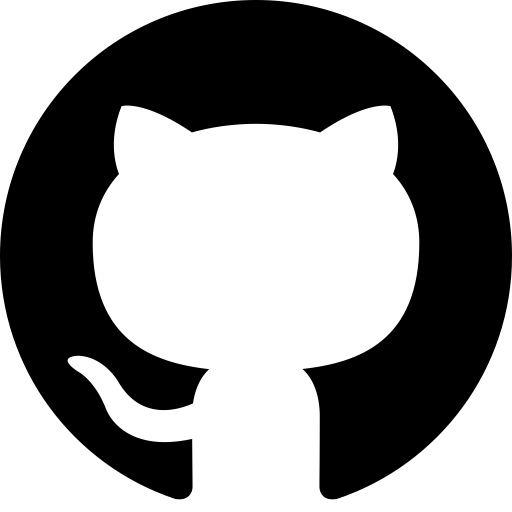

#Repositorio de github
https://github.com/JoshuaPicado/Agrovoltaic1/blob/main/agrovoltaic.py
